In [3]:
import numpy as np
import pandas as pd
import sklearn

In [4]:
red = pd.read_csv("winequality-red.csv")

In [5]:
red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [6]:
def str_to_df(row):
    return row.split(";")

In [7]:
cols = str_to_df('fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"')

In [8]:
cols

['fixed acidity',
 '"volatile acidity"',
 '"citric acid"',
 '"residual sugar"',
 '"chlorides"',
 '"free sulfur dioxide"',
 '"total sulfur dioxide"',
 '"density"',
 '"pH"',
 '"sulphates"',
 '"alcohol"',
 '"quality"']

In [9]:
red_rows = red['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].apply(str_to_df)





In [10]:
data = list(red_rows)

In [11]:
for i in range(len(cols)):
    cols[i] = cols[i].replace('"', '')
    cols[i] = cols[i].replace(' ', '_')

In [12]:
df = pd.DataFrame(data, columns = cols)

In [13]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [14]:
import matplotlib.pyplot as plt

In [15]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
unique,96,143,80,91,153,60,144,436,89,96,65,6
top,7.2,0.6,0,2,0.08,6,28,0.9972,3.3,0.6,9.5,5
freq,67,47,132,156,66,138,43,36,57,69,139,681


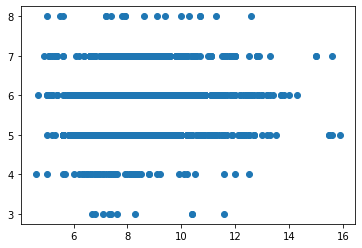

In [27]:
plt.scatter(df['fixed_acidity'], df['quality'])

In [22]:
df['quality'] = df['quality'].astype('int64')

In [25]:
df['fixed_acidity'] = df['fixed_acidity'].astype('float')

In [30]:
df['intercept'] = np.ones(df['quality'].shape[0])

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = np.array(df['fixed_acidity']).reshape(-1, 1)
y = np.array(df['quality']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression().fit(X_train, y_train)

print(regr.score(X_test, y_test))

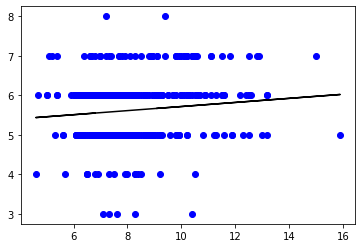

In [39]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [43]:
X = df.drop('quality', axis=1)
y = df['quality']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
regr = LinearRegression().fit(X_train, y_train)

In [46]:
print(regr.score(X_test, y_test))

0.3036354976803993
